<a href="https://colab.research.google.com/github/Aafreen2603/deep-learning/blob/main/Gradient_Descent_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the function 3𝑥2 − 3𝑥 + 4 to get its minimum value using Gradient Descent Algorithm.
Plot the necessary graphs and compare the minimum value with theoretical minimum.


In [ ]:
import numpy as np
%config InlineBackend.figure_formats = ['svg'] # to convert png images to vector format
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
def fx(x):
  return 3*x**2 - 3*x + 4
def deriv(x):
  return 6*x - 3

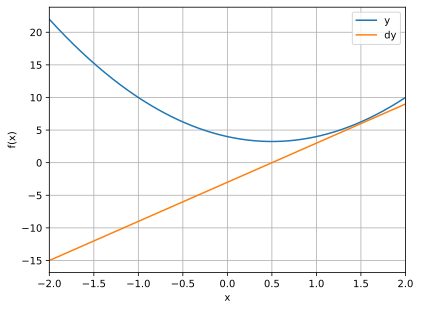

In [ ]:
x= np.linspace(-2,2,2001) #range for x

plt.plot(x,fx(x),x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [ ]:
localmin = np.random.choice(x,1) # random starting point
print(localmin)

# learning parameters
learning_rate = 0.01
training_epochs = 100

for i in range(training_epochs):
  grad = deriv(localmin)
  localmin -= learning_rate*grad
print(localmin)

[-0.486]
[0.49797389]


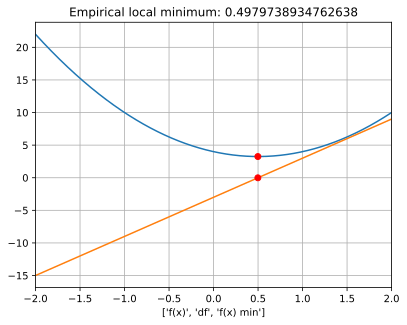

In [ ]:
plt.plot(x,fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin),'ro')
plt.plot(localmin, fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.xlabel('f(x)')
plt.xlabel(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s' %localmin[0])
plt.show()

In [ ]:
localmin = np.random.choice(x,1) # random starting point

# learning parameters
learning_rate = 0.01
training_epochs = 100

modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin -= learning_rate*grad
  modelparams[i,:] = localmin,grad

<ipython-input-17-319668a05418>:11: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i,:] = localmin,grad


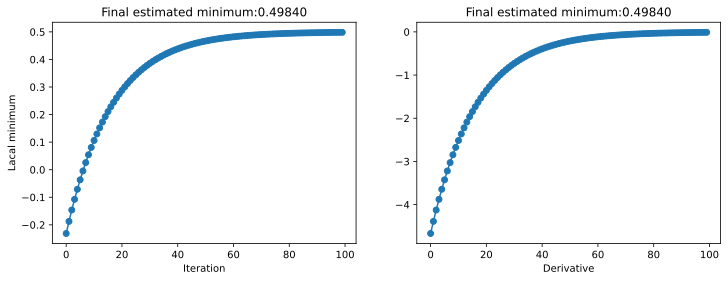

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum:{localmin[0]:.5f}')
ax[0].set_ylabel('Lacal minimum')
ax[1].set_xlabel('Derivative')
plt.show()

Develop an ANN model of regression for predicting the values.


In [ ]:
import numpy as np
import torch
import torch.nn as nn
%config InlineBackend.figure_formats = ['svg'] # to convert png images to vector format
import matplotlib.pyplot as plt
%matplotlib inline  

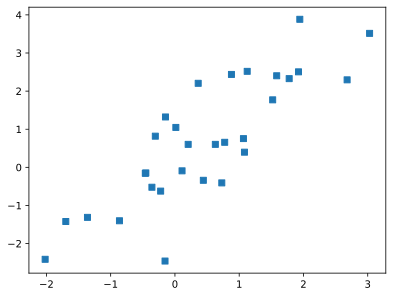

In [ ]:
#create data
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)
plt.plot(x,y,'s')
plt.show()

In [ ]:
#build model
ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), #activation layer
    nn.Linear(1,1) #output layer
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
learningrate = .05

lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningrate)

In [ ]:
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  yHat = ANNreg(x)
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

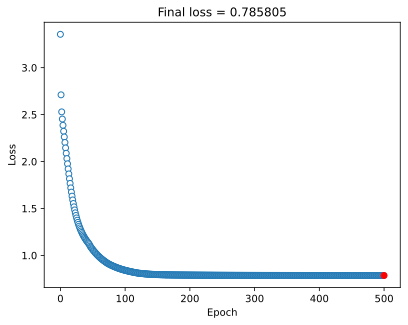

In [ ]:
#show the losses

# manually compute the losses
#final forward pass
pred = ANNreg(x)

#final loss (MSE)
testloss = (pred-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor = 'w',linewidth = 0.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [ ]:
testloss.item()

0.7858050465583801

IndexError: ignored

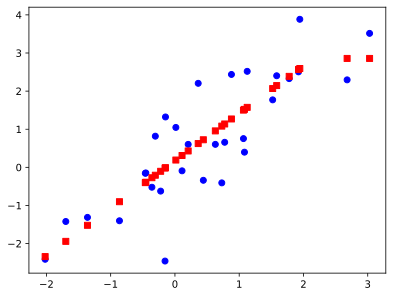

In [ ]:
plt.plot(x,y,'bo',label="Real data")
plt.plot(x,pred.detach(),'rs',label="Predictions")
plt.title(f'prediction-data r={np.corrcoef(y.T,pred.detach().T)[0.1]:.2f}')
plt.legend()
plt.show()